In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sn
import matplotlib.pyplot as pt
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression , Lasso, Ridge, ElasticNet
import  statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import boxcox
df= pd.read_csv(r"C:\Users\senth\OneDrive\Desktop\data\linear regresstion data set\data set for regression\Real estate polynomial.csv")

In [2]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.shape

(414, 8)

In [4]:
df=df.rename(columns={'X1 transaction date':'transaction_date',
                      'X2 house age':'house_age',
                      'X3 distance to the nearest MRT station':"distance_mrt_station",
                      'X4 number of convenience stores':'number_convenience_stores',
                      'X5 latitude':'latitude',
                      'X6 longitude':'longitude',
                      'Y house price of unit area':'house_price_unit_area'})

In [5]:
df=df.drop(['No','transaction_date'],axis=1)

In [6]:
df.columns

Index(['house_age', 'distance_mrt_station', 'number_convenience_stores',
       'latitude', 'longitude', 'house_price_unit_area'],
      dtype='object')

In [7]:
df

,house_age,distance_mrt_station,number_convenience_stores,latitude,longitude,house_price_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   house_age                  414 non-null    float64
 1   distance_mrt_station       414 non-null    float64
 2   number_convenience_stores  414 non-null    int64  
 3   latitude                   414 non-null    float64
 4   longitude                  414 non-null    float64
 5   house_price_unit_area      414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [9]:
continuos=['house_age', 
           'distance_mrt_station',
           ' number_convenience_stores', 
           'latitude',
           'longitude',
           'house_price_unit_area']


In [10]:
df.describe()

,house_age,distance_mrt_station,number_convenience_stores,latitude,longitude,house_price_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# data preprocessing

In [11]:
df.isnull().sum()

house_age                    0
distance_mrt_station         0
number_convenience_stores    0
latitude                     0
longitude                    0
house_price_unit_area        0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['house_age'].unique()

array([32. , 19.5, 13.3,  5. ,  7.1, 34.5, 20.3, 31.7, 17.9, 34.8,  6.3,
       13. , 20.4, 13.2, 35.7,  0. , 17.7, 16.9,  1.5,  4.5, 10.5, 14.7,
       10.1, 39.6, 29.3,  3.1, 10.4, 19.2, 25.9, 29.6, 37.9, 16.5, 15.4,
       13.9, 12. , 16.2, 13.6, 16.8, 36.1, 34.4,  2.7, 36.6, 21.7, 35.9,
       24.2, 29.4, 31.3, 32.1, 16.1, 33.6,  3.5, 30.3, 11. ,  5.3, 17.2,
        2.6, 17.5, 40.1,  1. ,  8.5, 30.4, 12.5,  6.6, 35.5, 32.5, 13.8,
        6.8, 12.3, 20.5, 38.2, 18. , 11.8, 30.8, 25.3, 15.1,  1.8,  8.9,
       23. ,  9.1, 20.6, 31.9, 40.9,  8. ,  6.4, 28.4, 16.4, 12.7,  1.1,
       32.7, 12.2, 31.4,  4. ,  8.1, 33.3,  9.9, 14.8, 30.6, 30.9, 16.6,
       31.5, 38.6,  3.8, 41.3, 38.5, 26.6, 33.4, 18.9, 11.4, 10. , 12.9,
        5.1, 19.8, 11.9,  2.1,  3.2, 34.9, 35.8,  4.9,  6.5, 30.7, 11.6,
       15.5, 16. , 13.7, 28.2, 27.6,  8.4, 24. ,  3.6,  4.3, 30.2, 33. ,
       13.1, 14. , 26.9, 13.5, 17. , 14.1, 20.9, 16.3, 35.3, 43.8,  9.7,
       15.2, 22.8, 34. , 18.2, 17.4, 38.3, 15.6, 12

In [14]:
df['distance_mrt_station'].unique()

array([  84.87882,  306.5947 ,  561.9845 ,  390.5684 , 2175.03   ,
        623.4731 ,  287.6025 , 5512.038  , 1783.18   ,  405.2134 ,
         90.45606,  492.2313 , 2469.645  , 1164.838  ,  579.2083 ,
        292.9978 ,  350.8515 ,  368.1363 ,   23.38284, 2275.877  ,
        279.1726 , 1360.139  ,  480.6977 , 1487.868  ,  383.8624 ,
        276.449  ,  557.478  ,  451.2438 , 4519.69   ,  769.4034 ,
        488.5727 ,  323.655  ,  205.367  , 4079.418  , 1935.009  ,
        577.9615 ,  289.3248 , 4082.015  , 4066.587  ,  519.4617 ,
        512.7871 ,  533.4762 ,  488.8193 ,  463.9623 ,  640.7391 ,
       4605.749  , 4510.359  ,  512.5487 , 1758.406  , 1438.579  ,
       1160.632  ,  371.2495 ,   56.47425,  336.0532 , 1931.207  ,
        259.6607 , 2175.877  ,  995.7554 ,  123.7429 ,  193.5845 ,
        104.8101 ,  464.223  ,  424.5442 ,  379.5575 ,  616.4004 ,
       2185.128  ,  552.4371 , 1414.837  ,  377.7956 ,  150.9347 ,
       2707.392  ,  383.2805 ,  338.9679 , 1455.798  , 1406.43

In [15]:
df['longitude'].unique()

array([121.54024, 121.53951, 121.54391, 121.54245, 121.51254, 121.53642,
       121.54228, 121.48458, 121.51486, 121.53372, 121.5431 , 121.53737,
       121.51046, 121.53406, 121.54619, 121.54458, 121.53119, 121.54451,
       121.54102, 121.51151, 121.54541, 121.54842, 121.53885, 121.51726,
       121.53913, 121.53797, 121.54694, 121.49587, 121.53408, 121.53451,
       121.54281, 121.54243, 121.51816, 121.51458, 121.54722, 121.54348,
       121.50381, 121.50342, 121.53758, 121.54301, 121.54765, 121.54494,
       121.53715, 121.49578, 121.49542, 121.53842, 121.55282, 121.5175 ,
       121.53009, 121.54059, 121.53711, 121.53438, 121.51471, 121.54516,
       121.54915, 121.54329, 121.54089, 121.54067, 121.53805, 121.53762,
       121.53767, 121.51237, 121.53381, 121.54887, 121.53964, 121.54252,
       121.50831, 121.54464, 121.54413, 121.549  , 121.52758, 121.50243,
       121.53059, 121.5276 , 121.53076, 121.54026, 121.53299, 121.53411,
       121.52984, 121.53844, 121.5425 , 121.54308, 

In [16]:
df['number_convenience_stores'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

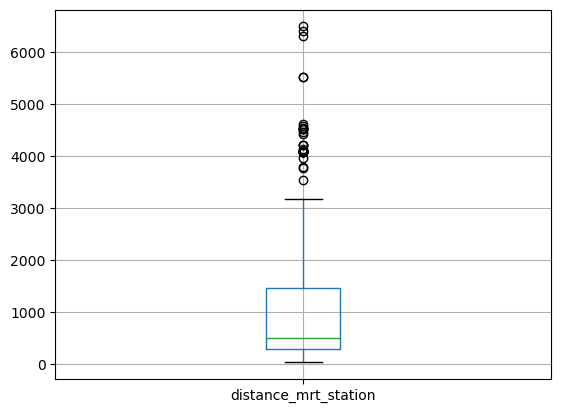

In [17]:
df.boxplot(column=['distance_mrt_station'])
pt.show()

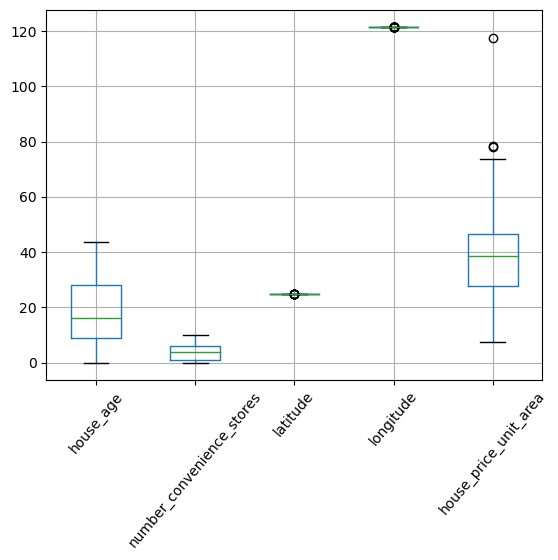

In [18]:
df.boxplot(column=['house_age','number_convenience_stores','latitude','longitude','house_price_unit_area'])
pt.xticks(rotation=50)
pt.show()

In [19]:
df.skew()

house_age                    0.382926
distance_mrt_station         1.888757
number_convenience_stores    0.154607
latitude                    -0.438598
longitude                   -1.219591
house_price_unit_area        0.599853
dtype: float64

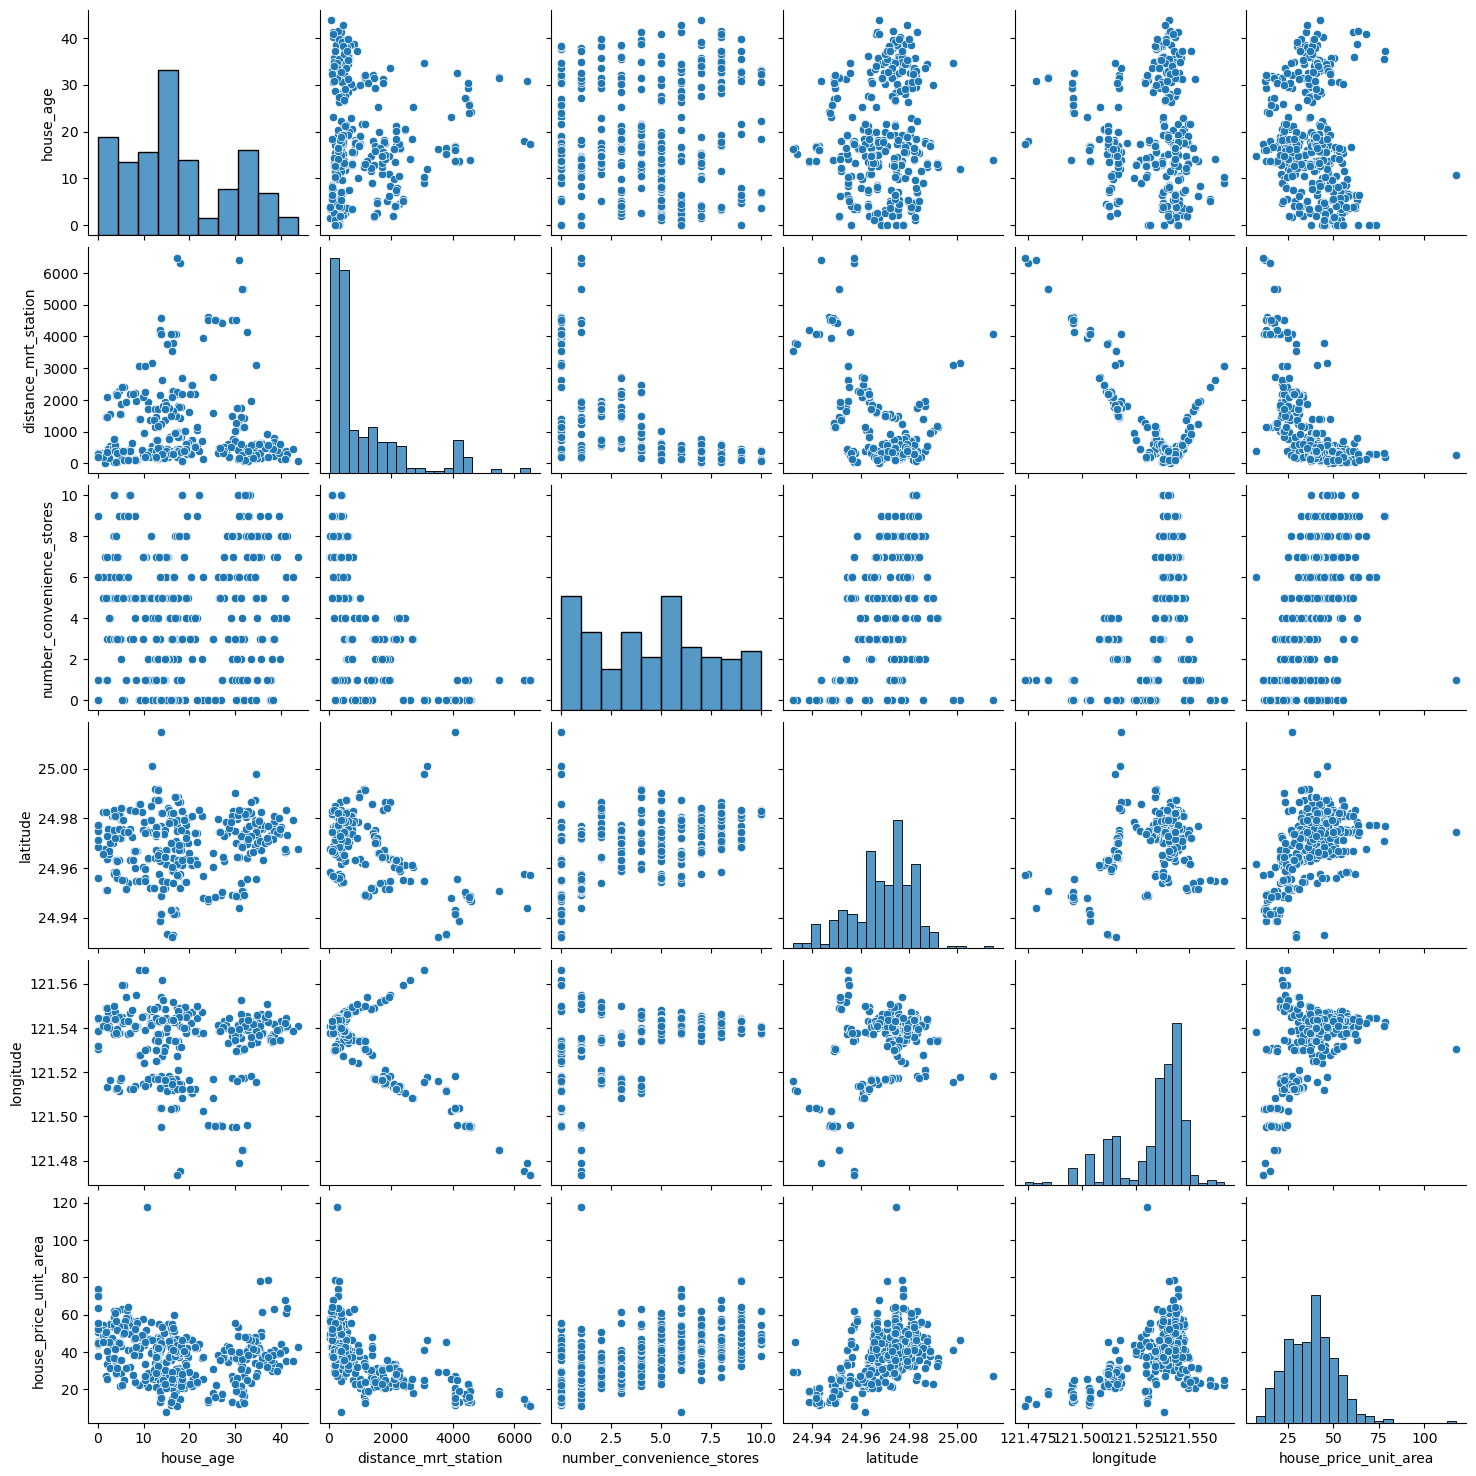

In [20]:
sn.pairplot(df)
pt.show()

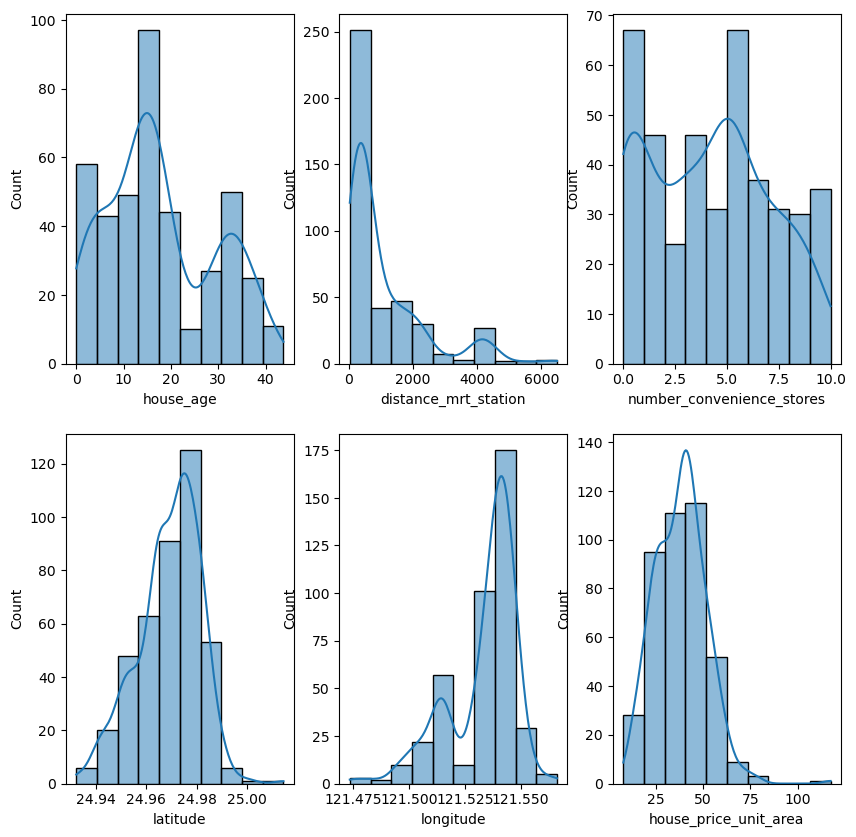

In [21]:
pt.figure(figsize=(10,10))

pt.subplot(2,3,1)
sn.histplot(df['house_age'],bins=10,kde=True)

pt.subplot(2,3,2)
sn.histplot(df['distance_mrt_station'],bins=10,kde=True)

pt.subplot(2,3,3)
sn.histplot(df['number_convenience_stores'],bins=10,kde=True)

pt.subplot(2,3,4)
sn.histplot(df['latitude'],bins=10 ,kde=True)

pt.subplot(2,3,5)
sn.histplot(df['longitude'],bins=10,kde=True)

pt.subplot(2,3,6)
sn.histplot(df['house_price_unit_area'],bins= 10,kde=True)

pt.show()

In [22]:
df.corr()

,house_age,distance_mrt_station,number_convenience_stores,latitude,longitude,house_price_unit_area
house_age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_mrt_station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number_convenience_stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
house_price_unit_area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


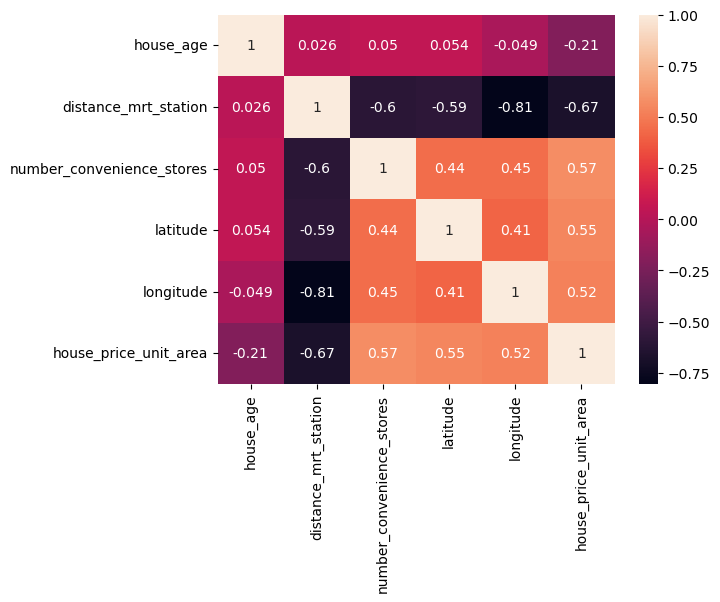

In [23]:
sn.heatmap(df.corr(),annot=True,cbar=True,)
pt.show()

In [24]:
df.skew()

house_age                    0.382926
distance_mrt_station         1.888757
number_convenience_stores    0.154607
latitude                    -0.438598
longitude                   -1.219591
house_price_unit_area        0.599853
dtype: float64

# no data cleaning

# data wrangling

In [25]:
# the data have right skewness , becouse i can perporm  root transformation to reduce the skew ness in the data 


df['distance_mrt_station']=(df['distance_mrt_station'])**(1/3)
df['distance_mrt_station'].skew()

0.7709903960922133

In [26]:
# the data have left  skewness , becouse i can perporm  root transformation to reduce the skew ness in the data 
#df['exp_longitude'],param=boxcox(df['longitude'])


# model selection

In [27]:
X=df.drop(columns=["house_price_unit_area"])
y=df["house_price_unit_area"]


X_train , X_test,y_train,y_test= train_test_split(X,y,train_size=0.8,random_state=1)

model=LinearRegression()
model.fit(X_train,y_train)


print("coefficient :",model.coef_)
print("intercept :",model.intercept_)

ypred_train=model.predict(X_train)
print("train rmse :",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("train r2 score :",r2_score(y_train,ypred_train))

print('cross val :',cross_val_score(model,X_train,y_train,cv=5,scoring='r2').mean())

ypred_test=model.predict(X_test)
print("test rmse :",np.sqrt(mean_squared_error(y_test,ypred_test)))
print("test r2 score :",r2_score(y_test,ypred_test))


coefficient : [-2.28625775e-01 -2.49724104e+00  3.97568370e-01  2.49229673e+02
 -6.89699433e+01]
intercept : 2222.5786937560297
train rmse : 8.706085232253074
train r2 score : 0.6016223833361576
cross val : 0.5823903737350438
test rmse : 6.588674915958382
test r2 score : 0.7140011466565956


In [28]:
X

,house_age,distance_mrt_station,number_convenience_stores,latitude,longitude
0,32.0,4.394739,10,24.98298,121.54024
1,19.5,6.743027,9,24.98034,121.53951
2,13.3,8.252296,5,24.98746,121.54391
3,13.3,8.252296,5,24.98746,121.54391
4,5.0,7.309691,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,15.981770,0,24.94155,121.50381
410,5.6,4.488962,9,24.97433,121.54310
411,18.8,7.312193,7,24.97923,121.53986
412,8.1,4.714848,5,24.96674,121.54067


In [29]:
model1=smf.ols('y~X',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     137.6
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           3.28e-85
Time:                        15:49:13   Log-Likelihood:                -1463.2
No. Observations:                 414   AIC:                             2938.
Df Residuals:                     408   BIC:                             2963.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -846.7213   4868.574     -0.174      0.862   -1.04e+04    8723.899
X[0]          -0.2477      0.036     -6.800      0.000      -0.319      -0.176
X[1]          -2.2510      0.223    -10.091      0.000      -2.690      -1.813
X[2]           0.5479      0.194      2.829      0.005       0.167       0.929
X[3]         243.9624     39.660      6.151      0.000     165.998     321.926
X[4]         -42.6578     39.652     -1.076      0.283    -120.606      35.291
==============================================================================
Omnibus:                      255.540   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4602.513
Skew:                           2.271   Prob(JB):                         0.00
Kurtosis:                      18.690   Cond. No.                     1.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

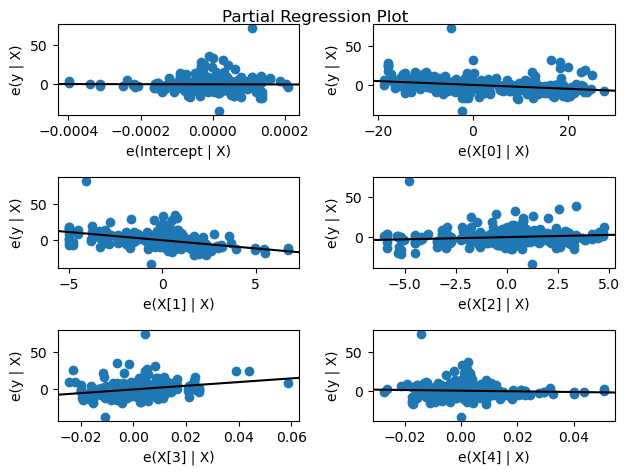

In [30]:
sm.graphics.plot_partregress_grid(model1)

In [31]:
df.columns

Index(['house_age', 'distance_mrt_station', 'number_convenience_stores',
       'latitude', 'longitude', 'house_price_unit_area'],
      dtype='object')

# vif characteristics


In [32]:
sqrt_house_age=smf.ols('house_age ~ distance_mrt_station+number_convenience_stores+latitude+longitude',data=df).fit().rsquared
vif_house_age=(1/1-sqrt_house_age)


sqrt_distance_mrt_station=smf.ols('distance_mrt_station ~ house_age+number_convenience_stores+latitude+longitude',data=df).fit().rsquared
vif_distance_mrt_station=(1/1-sqrt_distance_mrt_station)


sqrt_number_convenience_stores=smf.ols('number_convenience_stores ~ house_age+distance_mrt_station+latitude+longitude',data=df).fit().rsquared
vif_number_convenience_stores=(1/1-sqrt_number_convenience_stores)


sqrt_latitude=smf.ols('latitude ~ house_age+distance_mrt_station+number_convenience_stores+longitude',data=df).fit().rsquared
vif_latitude=(1/1-sqrt_latitude)


sqrt_longitude=smf.ols('longitude ~ house_age+distance_mrt_station+number_convenience_stores+latitude',data=df).fit().rsquared
vif_longitude=(1/1-sqrt_longitude)


vif_values={"columns":["house_age",
                       'distance_mrt_station',
                       'number_convenience_stores',
                       'latitude',
                       'longitude'],
           "values":[vif_house_age,
                     vif_distance_mrt_station,
                     vif_number_convenience_stores,
                     vif_latitude,
                     vif_longitude]}
vif_val=pd.DataFrame(vif_values)
vif_val

,columns,values
0,house_age,0.980747
1,distance_mrt_station,0.288580
2,number_convenience_stores,0.518926
3,latitude,0.697442
4,longitude,0.456227


# checking assumptions


In [33]:
test_res=y_test-ypred_test
test_res

388    -1.642943
102     4.606042
187     2.764677
162    -3.904959
90     -3.859567
         ...    
322   -14.962140
119    11.929077
245    -1.275154
146     2.357014
360    -4.737232
Name: house_price_unit_area, Length: 83, dtype: float64

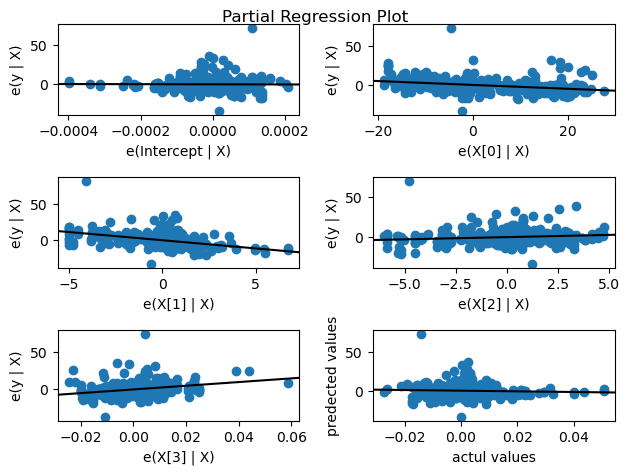

In [34]:
pt.scatter(y_test,test_res)
pt.xlabel("actul values")
pt.ylabel("predected values")
pt.show()

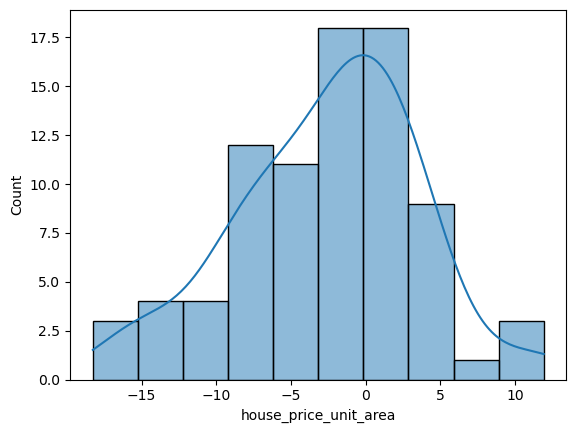

In [35]:
sn.histplot(test_res,bins=10,kde=True)
pt.show()

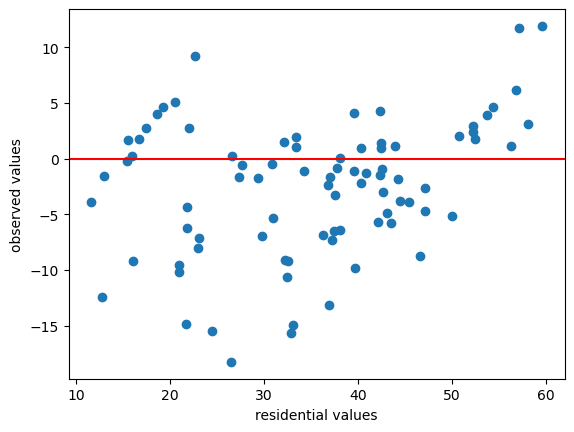

In [36]:
pt.scatter(y_test,test_res)
pt.axhline(y=0,color='r')
pt.xlabel("residential values")
pt.ylabel("observed values")
pt.show()

# polynomail regression 


In [37]:
poly_model=PolynomialFeatures(degree=2)
poly_train=pd.DataFrame(poly_model.fit_transform(X_train))

model.fit(poly_train,y_train)
print("coefficient :",model.coef_)
print("intercept :",model.intercept_)

poly_ypred_train=model.predict(poly_train)
print(" poly train rmse :",np.sqrt(mean_squared_error(y_train,poly_ypred_train)))
print("poly tain r2 score :",r2_score(y_train,poly_ypred_train))
print("poly cross validation :",cross_val_score(model,poly_train,y_train,cv=5,scoring="r2").mean())

poly_test=pd.DataFrame(poly_model.transform(X_test))
poly_ypred_test=model.predict(poly_test )

print("poly test rmse :",np.sqrt(mean_squared_error(y_test,poly_ypred_test)))
print("poly test r2 score :",r2_score(y_test,poly_ypred_test))

    


coefficient : [ 0.00000000e+00  4.99501854e+02  9.34534256e+03  7.86311688e+03
  6.51124770e+05  1.30720248e+06  2.02759755e-02  1.45687069e-02
  1.75097501e-02 -7.27312247e+00 -2.62569705e+00 -1.70681303e-01
 -2.20654342e-01 -1.84271874e+02 -3.90258398e+01  5.35144326e-02
 -1.81818447e+02 -2.73287337e+01  9.30012195e+03 -9.15553792e+03
 -4.43535273e+03]
intercept : -87629932.29954505
 poly train rmse : 7.74920352850722
poly tain r2 score : 0.6843809305742699
poly cross validation : 0.6258525621677663
poly test rmse : 6.659684621449992
poly test r2 score : 0.7078031983628621


# lasso model


In [38]:
estimator= Lasso()
params ={"alpha":list(range(1,100))}

model_hp=GridSearchCV(estimator,params,cv=5,scoring='r2')
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 1}

In [39]:
lasso_model=Lasso(alpha=1)
lasso_model.fit(X_train,y_train)
print(" lasso coefficent :",lasso_model.coef_)
print("lasso intercept :",lasso_model.intercept_)

lasso_ypred_train=lasso_model.predict(X_train)
print("lasso train rmse :",np.sqrt(mean_squared_error(y_train,lasso_ypred_train)))
print("lasso train r2 score :",r2_score(y_train,lasso_ypred_train))
print("lasso cross val :",cross_val_score(lasso_model,X_train,y_train,cv=5,scoring='r2').mean())

lasso_ypred_test=lasso_model.predict(X_test)
print("lasso test rmse :",np.sqrt(mean_squared_error(y_test,lasso_ypred_test)))
print("lasso test r2 score :",r2_score(y_test,lasso_ypred_test))


 lasso coefficent : [-0.19748739 -2.53903507  0.53837827  0.         -0.        ]
lasso intercept : 62.738761008542696
lasso train rmse : 9.133952397178374
lasso train r2 score : 0.5615030391239166
lasso cross val : 0.5369008747225837
lasso test rmse : 6.745963696179282
lasso test r2 score : 0.7001830849917435


In [40]:
X1=df.drop(columns=['latitude','longitude','house_price_unit_area'])
y1=df['house_price_unit_area']

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,train_size=0.8,random_state=1)

In [41]:
lasso_model=Lasso(alpha=1)
lasso_model.fit(X1_train,y1_train)
print(" lasso coefficent :",lasso_model.coef_)
print("lasso intercept :",lasso_model.intercept_)

lasso_ypred_train=lasso_model.predict(X1_train)
print("lasso train rmse :",np.sqrt(mean_squared_error(y1_train,lasso_ypred_train)))
print("lasso train r2 score :",r2_score(y1_train,lasso_ypred_train))
print("lasso cross val :",cross_val_score(lasso_model,X1_train,y1_train,cv=5,scoring='r2').mean())

lasso_ypred_test=lasso_model.predict(X1_test)
print("lasso test rmse :",np.sqrt(mean_squared_error(y1_test,lasso_ypred_test)))
print("lasso test r2 score :",r2_score(y1_test,lasso_ypred_test))


 lasso coefficent : [-0.19748739 -2.53903507  0.53837827]
lasso intercept : 62.738761008542696
lasso train rmse : 9.133952397178374
lasso train r2 score : 0.5615030391239166
lasso cross val : 0.5369008747225837
lasso test rmse : 6.745963696179282
lasso test r2 score : 0.7001830849917435


# ridge model

In [42]:
estimator =Ridge()
params={"alpha":list(range(1,100))}
model_h=GridSearchCV(estimator,params,cv=5,scoring='r2')
model_h.fit(X_train,y_train)
model_h.best_params_

{'alpha': 1}

In [43]:
ridge_model=Ridge(alpha=1)
ridge_model.fit(X_train,y_train)
print(" ridge coefficent :",ridge_model.coef_)
print("ridge intercept :",ridge_model.intercept_)

ridge_ypred_train=ridge_model.predict(X_train)
print("ridge train rmse :",np.sqrt(mean_squared_error(y_train,ridge_ypred_train)))
print("ridge train r2 score :",r2_score(y_train,ridge_ypred_train))
print("ridge cross val :",cross_val_score(ridge_model,X_train,y_train,cv=5,scoring='r2').mean())

ridge_ypred_test=ridge_model.predict(X_test)
print("ridge test rmse :",np.sqrt(mean_squared_error(y_test,ridge_ypred_test)))
print("ridge test r2 score :",r2_score(y_test,ridge_ypred_test))

 ridge coefficent : [-0.20578186 -2.56592897  0.62288265  9.04812183 -2.01659905]
ridge intercept : 81.93113887233591
ridge train rmse : 9.097715200352383
ridge train r2 score : 0.5649754418536672
ridge cross val : 0.5392143867039276
ridge test rmse : 6.6978189499131515
ridge test r2 score : 0.7044472943246429


# elastic net

In [44]:
estimator=ElasticNet()
params={'alpha':[1,2,3,5,6,7,8,9,10],'l1_ratio':[0.1,0.5,0.75,0.9,0.95,1]}
model_h1=GridSearchCV(estimator,params,cv=5,scoring='r2')
model_h1.fit(X_train,y_train)
model_h1.best_params_

{'alpha': 1, 'l1_ratio': 0.5}

In [45]:
elastic_model=ElasticNet(alpha=1,l1_ratio=0.5)
elastic_model.fit(X_train,y_train)
print(" elastic coefficent :",elastic_model.coef_)
print("elastic intercept :",elastic_model.intercept_)

elastic_ypred_train=elastic_model.predict(X_train)
print("elastic train rmse :",np.sqrt(mean_squared_error(y_train,elastic_ypred_train)))
print("elastic train r2 score :",r2_score(y_train,elastic_ypred_train))
print("elastic cross val :",cross_val_score(elastic_model,X_train,y_train,cv=5,scoring='r2').mean())

elastic_ypred_test=elastic_model.predict(X_test)
print("elastic test rmse :",np.sqrt(mean_squared_error(y_test,elastic_ypred_test)))
print("elastic test r2 score :",r2_score(y_test,elastic_ypred_test))

 elastic coefficent : [-0.20345463 -2.39585797  0.67085355  0.         -0.        ]
elastic intercept : 61.00382520657885
elastic train rmse : 9.141247685651852
elastic train r2 score : 0.5608023042852177
elastic cross val : 0.5376824659217256
elastic test rmse : 6.694679926570096
elastic test r2 score : 0.7047242589450988
